In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
xl = pd.ExcelFile("data.xlsx")

In [3]:
xl.sheet_names


['Tabelle1', 'Tabelle2', 'Tabelle3']

In [4]:
df = xl.parse("Tabelle1")
#dropping rows for which avgDistance or place is not known because that is useless for our model
#only 136 rows has labeled avgDistance and bestPlace


#removing places for which frequency is very less 
freq = df['bestSpot'].value_counts()
to_remove = freq[freq<7].index
df['bestSpot'].replace(to_remove,None,inplace = True)
df = df.dropna()

df.index = range(df.shape[0]) #changing row number to 0 to 103

freq = df['bestSpot'].value_counts().index.values
colors = ['b','g','r','c','m','y']
colorMap = {}
for i,city in enumerate(freq):
    colorMap[city] = colors[i]
    

colList = list(df)
#dropping temperature gradient
goodFeatures  = []
for i in range(len(colList)):
    if 'tempGradient' not in colList[i]:
        goodFeatures.append(i)
df = df.iloc[:,goodFeatures]

#removing data points where distance travelled is very less compared to others
#df = df[df['avgDistance']>=20]

#keeping only inputs in df
y = df.iloc[:,:3] #outputs
print(list(y))
df = df.iloc[:,3:]  #inputs

#printing indices for every parameter for reference
colList = list(df)
ind = {}
for i in range(len(colList)):
    ind[i] = colList[i]
print(ind)

y.head()
df.head()

['date', 'bestSpot', 'avgDistance']
{0: 'milano interpolated pressure', 1: 'trappes interpolated pressure', 2: 'stuttgart interpolated pressure', 3: 'muenchen interpolated pressure', 4: 'payerne interpolated pressure', 5: 'milano interpolated temp', 6: 'trappes interpolated temp', 7: 'stuttgart interpolated temp', 8: 'muenchen interpolated temp', 9: 'payerne interpolated temp', 10: 'milano interpolated windSpeed', 11: 'trappes interpolated windSpeed', 12: 'stuttgart interpolated windSpeed', 13: 'muenchen interpolated windSpeed', 14: 'payerne interpolated windSpeed'}


,milano interpolated pressure,trappes interpolated pressure,stuttgart interpolated pressure,muenchen interpolated pressure,payerne interpolated pressure,milano interpolated temp,trappes interpolated temp,stuttgart interpolated temp,muenchen interpolated temp,payerne interpolated temp,milano interpolated windSpeed,trappes interpolated windSpeed,stuttgart interpolated windSpeed,muenchen interpolated windSpeed,payerne interpolated windSpeed
0,"961.53, 951.81, 942.1, 932.38, 904.63, 901.63,...","967.03, 957.07, 947.11, 937.15, 927.19, 884.68...","970.24, 959.49, 946.46, 934.75, 926.42, 914.29...","959.34, 956.81, 943.52, 932.18, 925.32, 912.78...","971.91, 959.48, 945.77, 935.22, 926.01, 911.2,...","12.57, 12.26, 11.95, 11.64, 10.19, 10.02, 9.84...","6.75, 6.43, 6.11, 5.79, 5.47, 7.01, 7.24, 7.46...","10.36, 10.13, 9.38, 8.58, 8, 7.22, 6.1, 5.5, 5...","8.24, 8.59, 7.94, 7.31, 6.93, 5.91, 5.08, 4.44...","4.38, 8.56, 9.98, 10.23, 9.57, 8.47, 7.76, 7.0...","4.49, 4.36, 4.23, 4.1, 8.53, 9.19, 9.86, 16.12...","7.56, 7.43, 7.29, 7.16, 7.03, 7, 7, 7, 7, 7, 7...","14.78, 14.14, 11.21, 11.51, 11.93, 10.05, 8.9,...","6.96, 7.75, 9.39, 11.45, 12, 10.12, 8.53, 10.8...","2.12, 3.14, 11.94, 14, 14, 15.81, 15.59, 15.38..."
1,"961.37, 951.51, 941.66, 931.8, 887.11, 881.56,...","956.39, 948.34, 940.29, 932.24, 894.8, 888.28,...","960.9, 951.9, 942.9, 933.91, 912.65, 909.95, 8...","965.44, 956.58, 940.34, 932.44, 906.12, 898.69...","968.32, 956.95, 945.58, 934.21, 919.46, 907.25...","11.85, 11.46, 11.07, 10.67, 9.19, 9.01, 8.83, ...","8.49, 7.91, 7.32, 6.73, 6.44, 6.49, 6.55, 6.6,...","8.76, 8.3, 7.83, 7.36, 6.51, 6.43, 7.16, 6.88,...","6.47, 7.99, 7.51, 6.88, 4.79, 4.2, 3.6, 3.01, ...","5.47, 6.61, 7.74, 8.88, 9.62, 9.25, 8.96, 8.67...","5, 5, 5, 5, 4.49, 4.42, 4.35, 4.27, 4.2, 4.13,...","11.41, 10.8, 10.18, 9.56, 6.18, 5.57, 4.96, 4....","1, 1, 1, 1, 4.09, 4.76, 3.49, 4.73, 5.78, 6, 6...","0.93, 1.7, 2, 2, 3.37, 3.91, 4.45, 4.99, 5.54,...","0.33, 5.75, 11.18, 16.6, 22.85, 19.73, 16.98, ..."
2,"960.34, 950.3, 940.26, 930.22, 886.12, 880.6, ...","963.46, 952.49, 941.52, 930.55, 915.67, 905.86...","965.28, 955.93, 937.56, 932.09, 920.52, 910.17...","951.73, 948.28, 934.14, 928.92, 908.94, 901.1,...","963.97, 952.47, 940.98, 929.48, 916.01, 906.36...","11.43, 11.6, 11.76, 11.92, 9.51, 9.16, 8.8, 8....","7.49, 7.03, 6.58, 6.12, 6.92, 7.67, 8.42, 9.18...","6.69, 6.52, 5.41, 5.07, 4.51, 4.97, 7.57, 9.55...","5.76, 5.47, 4.28, 3.83, 2.52, 2.05, 1.57, 1.09...","8.52, 7.66, 6.8, 5.94, 5.01, 4.81, 5.41, 4.63,...","4.36, 3.69, 3.02, 2.35, 5.11, 5.55, 5.99, 6.44...","24.48, 27.93, 31.38, 34.83, 32.92, 31.77, 30.6...","11.1, 12.83, 17.36, 18.73, 19.41, 21.14, 21.95...","10.19, 11.63, 14.63, 15.41, 17.4, 18.08, 18.76...","4.23, 6.82, 9.41, 11.99, 14, 13.47, 8.89, 6.26..."
3,"955.98, 942.16, 931.13, 918.87, 906.43, 898.03...","942.48, 936.68, 930.87, 925.06, 908.18, 889.16...","954.95, 945.68, 936.4, 927.13, 908.74, 905.07,...","944.66, 941.19, 931.36, 925.49, 909.2, 901.2, ...","958.02, 946.99, 935.97, 925.33, 911, 901.73, 8...","9.97, 9.39, 8.89, 8.23, 7.52, 7.05, 6.57, 5.17...","7.96, 7.7, 7.45, 7.2, 6.44, 5.52, 5.13, 4.74, ...","8.4, 7.93, 7.47, 7.01, 6.66, 6.6, 5.55, 5.18, ...","6.47, 6.64, 7.39, 7.51, 6.63, 6.19, 5.58, 5.48...","8.35, 7.52, 6.7, 6.49, 5.85, 5.42, 5.35, 4.57,...","11, 1.8, 3.55, 8.45, 12.41, 14.77, 17.13, 23.1...","27.89, 27.26, 26.63, 26.01, 24.32, 19.68, 17.5...","14.59, 18.12, 21.66, 25.19, 31.69, 32.97, 27.1...","16.67, 18.4, 21.48, 22, 20.38, 19.65, 20.44, 2...","5.71, 9.65, 13.58, 13.11, 10, 8.01, 2.34, 3.14..."
4,"959.87, 950.95, 930.93, 926.63, 908.28, 902.01...","961.33, 935.29, 930.68, 926.06, 898.05, 890.23...","959.57, 952.63, 936.87, 926.48, 913.87, 904.19...","963.11, 952.31, 938.49, 927.14, 912.79, 903.74...","961.37, 949.76, 935.2, 925.85, 910.05, 900.22,...","7.17, 6.67, 5.39, 5.11, 4.31, 4.05, 3.04, 2.75...","10.35, 9.15, 8.82, 8.48, 6.89, 6.45, 6.02, 5.5...","8.58, 8.23, 7.44, 6.73, 5.66, 4.85, 4.03, 3.21...","4.55, 6.07,

In [5]:
avgDistance = y['avgDistance']
bestSpot = y['bestSpot']

payerne interpolated windSpeed


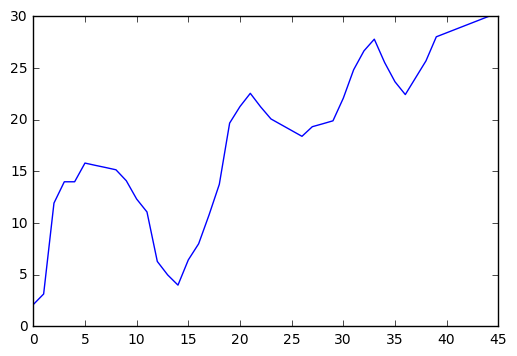

payerne interpolated windSpeed


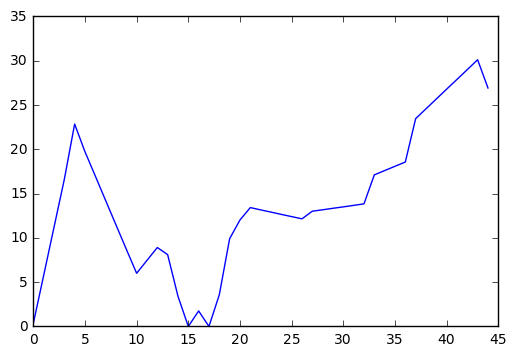

payerne interpolated windSpeed


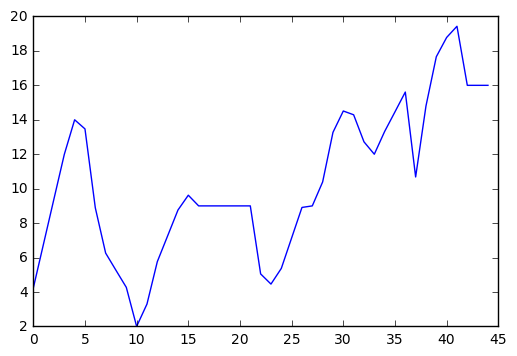

payerne interpolated windSpeed


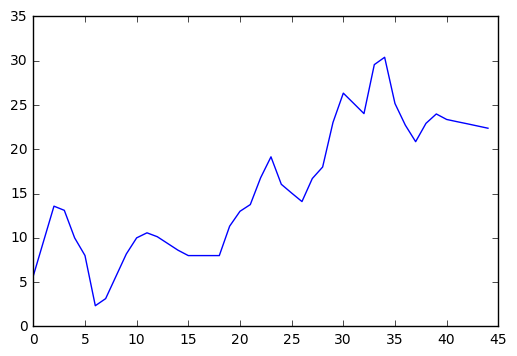

payerne interpolated windSpeed


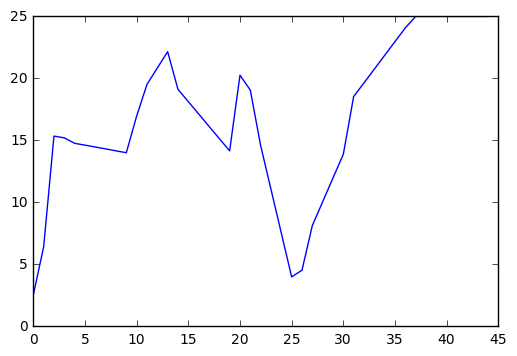

payerne interpolated windSpeed


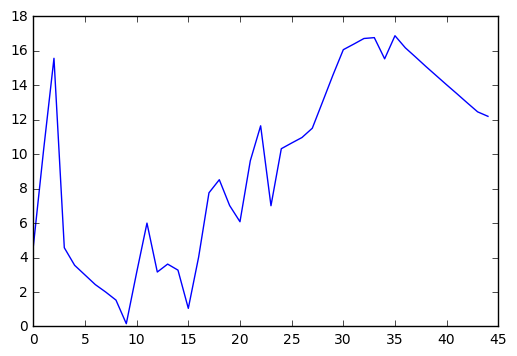

payerne interpolated windSpeed


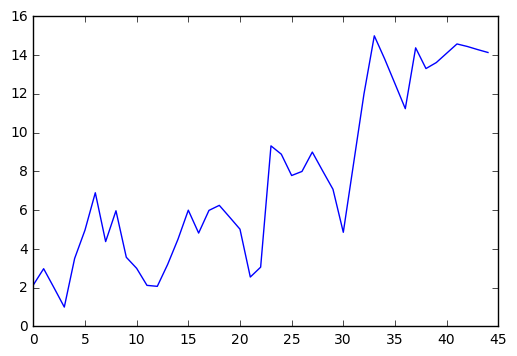

payerne interpolated windSpeed


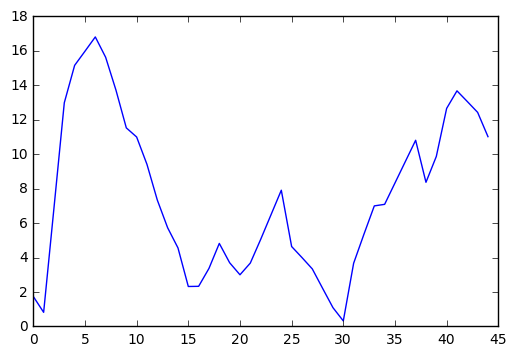

payerne interpolated windSpeed


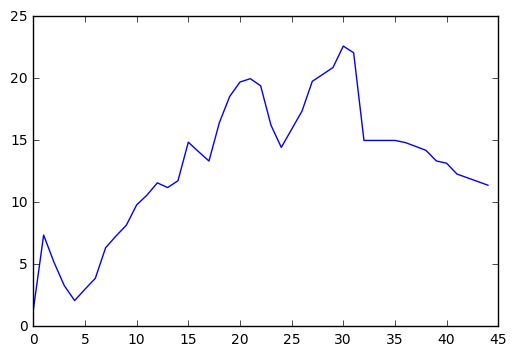

payerne interpolated windSpeed


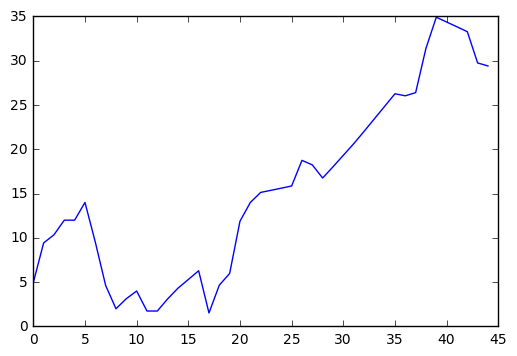

In [6]:
#visualising data for a single day for 10 days
for d in range(10):
    day = df.iloc[d]

    for i in range(14,15):
        allData = day.iloc[i]
        allData = allData.split(",")[:-1]
        allData = [(float)(s) for s in allData]
        plt.plot(allData)
        print(day.index[i])
        plt.show()

muenchen interpolated pressure


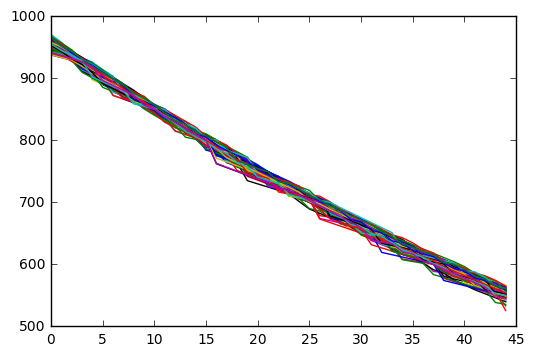

payerne interpolated pressure


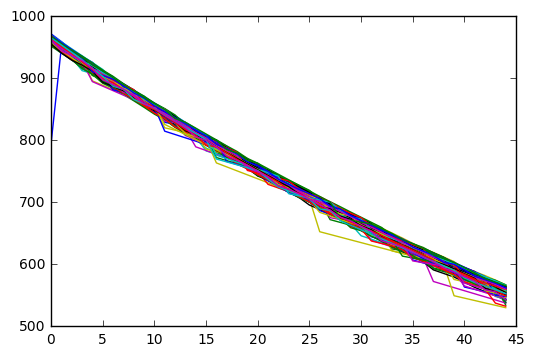

milano interpolated temp


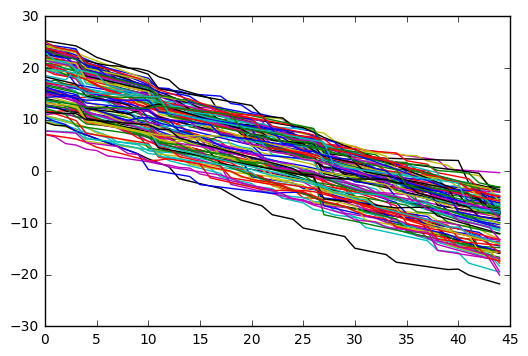

trappes interpolated temp


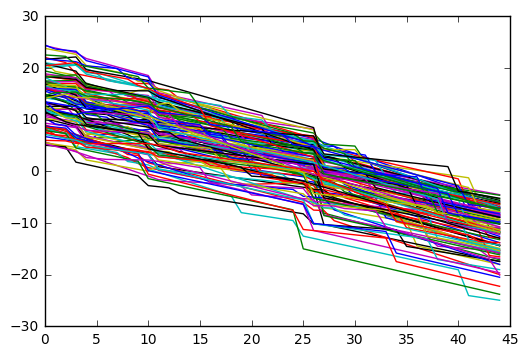

stuttgart interpolated temp


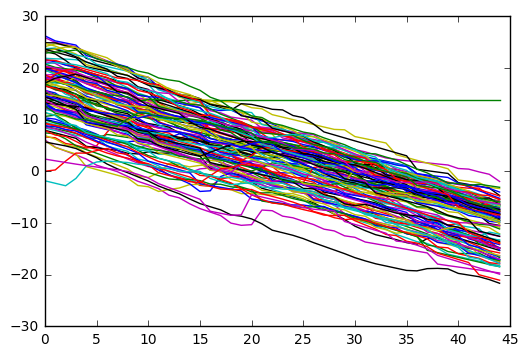

muenchen interpolated temp


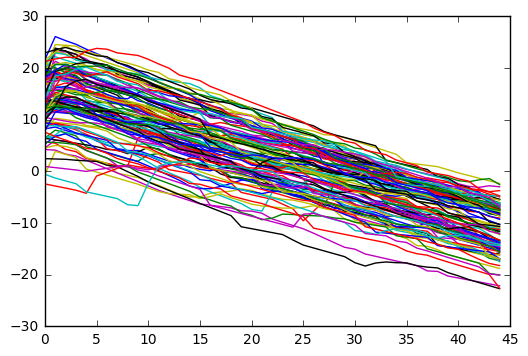

payerne interpolated temp


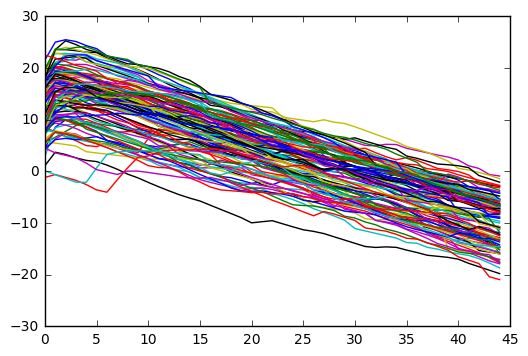

milano interpolated windSpeed


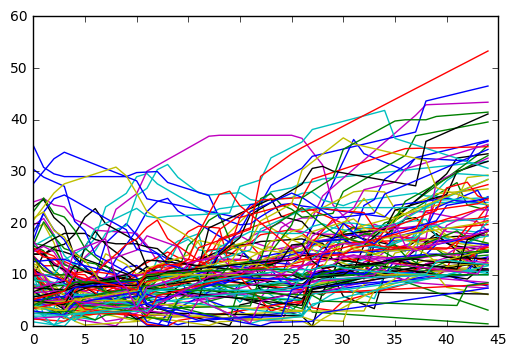

trappes interpolated windSpeed


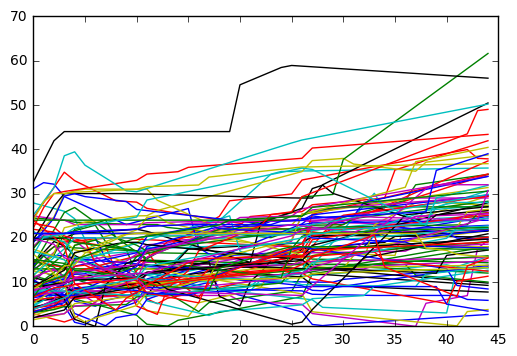

stuttgart interpolated windSpeed


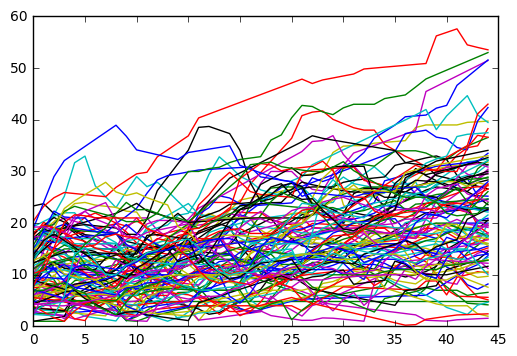

muenchen interpolated windSpeed


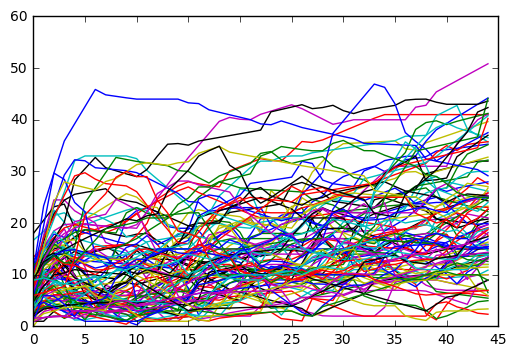

payerne interpolated windSpeed


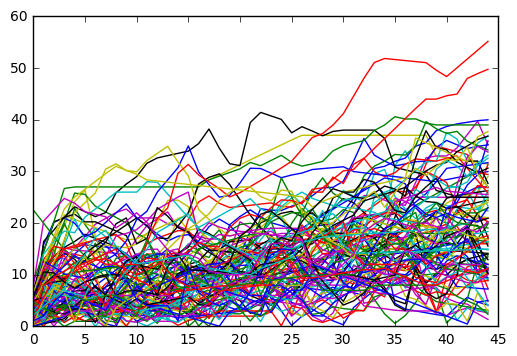

In [7]:
#visualising data for all days together

for col in range(3,df.shape[1]):
    print(list(df)[col])
    for row in range(df.shape[0]):
        day = df.iloc[row]
        allData = day.iloc[col]
        allData = allData.split(",")[:-1]
        allData = [(float)(s) for s in allData]
        plt.plot(allData)
    plt.show()

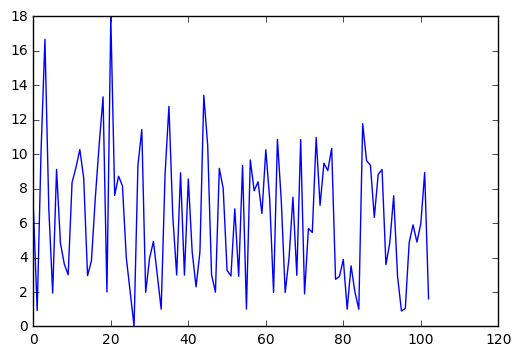

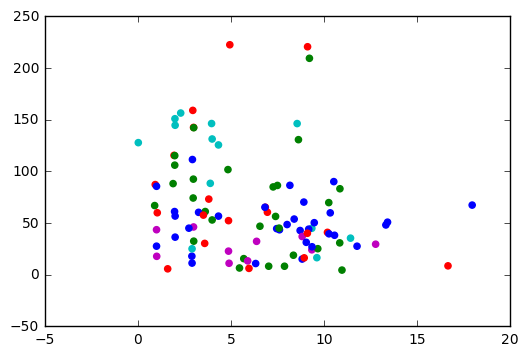

Average Distance


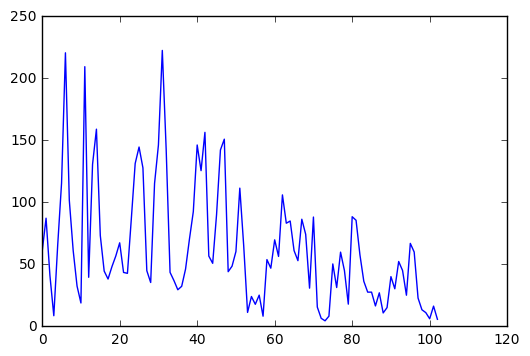

In [8]:
first = []
col = df.iloc[:,13] #number in bracket is the parameter index printed above
for string in col:
    allData = string.split(',')
    f = float(allData[0]) #number in bracket is point of time of each day like 0 represent first reading of each day
    first.append(f)

    
plt.plot(first)
plt.show()

plt.scatter(first,avgDistance,color = [colorMap[city] for city in y['bestSpot']])
plt.show()

print("Average Distance")
plt.plot(avgDistance)
plt.show()